In [1]:
import os 
import shutil, glob
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf 
from sklearn.model_selection import ParameterGrid


In [2]:
# def read_decode_jpg(file_path):
#     img = tf.io.read_file(file_path)
#     img = tf.image.decode_jpeg(img, channels=3)
#     return img

def manipulate_and_save(x, img_path, save_path):
    img = x['img']
    rotate90 = x['rotate90']
    rotate180 = x['rotate180']
    brightness = x['brightness']
    zoom51 = x['zoom51']
    zoom15 = x['zoom15']
    final_img_id = x['img_id']

    
    background_image_file = os.path.join(img_path, img)
    img = tf.keras.preprocessing.image.load_img(background_image_file)
    img = tf.keras.preprocessing.image.img_to_array(img)

    if rotate90:
        img = tf.keras.preprocessing.image.random_rotation(
            img, 90, 'nearest', channel_axis=2)

    if rotate180:
        img = tf.keras.preprocessing.image.random_rotation(
            img, 180, 'nearest', channel_axis=2)   
    if brightness: 
        img = tf.keras.preprocessing.image.random_brightness(
            img, (0.5, 0.5)
        )
    if zoom51:
        img = tf.keras.preprocessing.image.random_zoom(
            img, (.5,.1), row_axis=0, col_axis=1, channel_axis=2
        )
    if zoom15:
        img = tf.keras.preprocessing.image.random_zoom(
            img, (.1,.5), row_axis=0, col_axis=1, channel_axis=2
        )
        
    tf.keras.preprocessing.image.save_img(
        f'{save_path}/image_{final_img_id}.jpg',
        img, data_format='channels_last', file_format=None, scale=False
    )


    

In [3]:
manipulation_dict = {
    'rotate90': [False, True],
    'rotate180': [False, True], 
    'brightness': [False, True],
    'zoom51': [False, True], 
    'zoom15': [False, True]
}
all_manipulations = list(ParameterGrid(manipulation_dict))

In [4]:
all_manipulations = pd.DataFrame(all_manipulations)

In [2]:
bad_land = ['image_7386', 'image_6261', 'image_3298', 'image_3815',  'image_5374', 
            'image_4534', 'image_4689', 'image_8802', 'image_3159','image_8149',
            'image_8921', 'image_8553', 'image_6600', 'image_4155', 'image_8132', 
            'image_9004', 'image_4184', 'image_4997', 'image_8225', 'image_4242', 
            'image_5402', 'image_6965', 'image_7357', 'image_2409', 'image_2697', 
            'image_2130', 'image_1025', 'image_597', 'image_1332', 'image_8879', 
            'image_3185', 'image_3467', 'image_1753', 'image_651', 'image_3006', 
            'image_6758', 'image_7118', 'image_2303', 'image_3543', 'image_3931', 
            'image_5769', 'image_3654', 'image_1101', 'image_810', 'image_9687', 
            'image_4707', 'image_66', 'image_8301', 'image_1438', 'image_9933', 
            'image_7505', 'image_6890', 'image_3869', 'image_5985', 'image_5250', 
            'image_4410', 'image_8477', 'image_6724', 'image_7164', 'image_1088', 
            'image_8016', 'image_772', 'image_2765', 'image_1106', 'image_2800', 
            'image_465', 'image_1567', 'image_1915', 'image_4700', 'image_9680', 
            'image_6055', 'image_5521', 'image_128', 'image_9546', 'image_8306', 
            'image_4361', 'image_7274', 'image_2958', 'image_6434', 'image_7502', 
            'image_5982', 'image_7163', 'image_6723', 'image_5636', 'image_4067', 
            'image_8011', 'image_6266', 'image_3538', 'image_7436', 'image_7854', 
            'image_4294', 'image_4533', 'image_8554', 'image_8926', 'image_9314', 
            'image_7047', 'image_1159', 'image_4183', 'image_9003', 'image_7096', 
            'image_5405', 'image_9462', 'image_419', 'image_9810', 'image_6962', 
            'image_6029', 'image_2137', 'image_1022', 'image_2556', 'image_3316', 
            'image_541', 'image_4819', 'image_7454', 'image_6214', 'image_9366', 
            'image_7035', 'image_7792', 'image_4120', 'image_8196', 'image_7743', 
            'image_4590', 'image_1569', 'image_5477', 'image_7322', 'image_2145', 
            'image_152', 'image_1050', 'image_8769', 'image_3364', 'image_2283', 
            'image_2954', 'image_1843', 'image_5259', 'image_990', 'image_4419', 
            'image_1892', 'image_2252', 'image_3412', 'image_6899', 'image_1726', 
            'image_1081', 'image_2633', 'image_2194', 'image_361', 'image_1263', 
            'image_7428', 'image_6268', 'image_3536', 'image_1602', 'image_700', 
            'image_6609', 'image_7098', 'image_3186', 'image_3240', 'image_2400', 
            'image_417', 'image_9155', 'image_4772', 'image_7667', 'image_6780', 
            'image_13', 'image_9534', 'image_5921', 'image_6834', 'image_2558', 
            'image_2589', 'image_7902', 'image_7570', 'image_5225', 'image_239', 
            'image_9184', 'image_658', 'image_3531', 'image_3943', 'image_3296', 
            'image_707', 'image_1605', 'image_2407', 'image_3392', 
            'image_3247', 'image_6519', 'image_862', 'image_1512', 'image_8712', 
           'image_9817', 'image_6789', 'image_7579', 'image_2475', 'image_5954', 
           'image_7273', 'image_9237', 'image_2304']

In [3]:
landpath = '/data/ddmg/slabs/waterbirds/places_data/land/'
landfiles = [f for f in os.listdir(landpath) if os.path.isfile(os.path.join(landpath, f))]
landfiles = landfiles[:500]
bad_land = [x+'.jpg' for x in bad_land]

In [4]:
landfiles = [x for x in landfiles if x not in bad_land]

In [5]:
len(landfiles)

315

In [10]:
landimg_manipulated = []
for i in range(len(landfiles)):
    img_manipulation_df = all_manipulations.copy()
    img_manipulation_df['img'] = landfiles[i]
    landimg_manipulated.append(img_manipulation_df)

landimg_manipulated = pd.concat(landimg_manipulated)
landimg_manipulated.shape

(10080, 6)

In [11]:
landimg_manipulated = landimg_manipulated.sample(frac=1)
landimg_manipulated.reset_index(drop=True, inplace=True)
landimg_manipulated.head()

,brightness,rotate180,rotate90,zoom15,zoom51,img
0,True,True,False,False,False,image_5553.jpg
1,False,False,False,False,True,image_1960.jpg
2,False,False,False,True,False,image_8631.jpg
3,True,True,False,False,True,image_8526.jpg
4,True,False,True,False,False,image_2139.jpg


In [13]:
landimg_manipulated['img_id'] = landimg_manipulated.index

In [14]:
landimg_manipulated.head()

,brightness,rotate180,rotate90,zoom15,zoom51,img,img_id
0,True,True,False,False,False,image_5553.jpg,0
1,False,False,False,False,True,image_1960.jpg,1
2,False,False,False,True,False,image_8631.jpg,2
3,True,True,False,False,True,image_8526.jpg,3
4,True,False,True,False,False,image_2139.jpg,4


In [19]:
for i in range(landimg_manipulated.shape[0]):
    row = landimg_manipulated.iloc[i]
    manipulate_and_save(row, landpath, '/data/ddmg/slabs/waterbirds/places_data/land_easy')

In [ ]:
i = 2
background_image_file = os.path.join(landpath, landfiles[i])
background_image = read_decode_jpg(background_image_file)
img = tf.image.resize(background_image, (224, 224))
vals = tf.reduce_mean(img, [0,1])
img = tf.cast(img, tf.uint8)
plt.figure(figsize=(10,10))
plt.imshow(img)

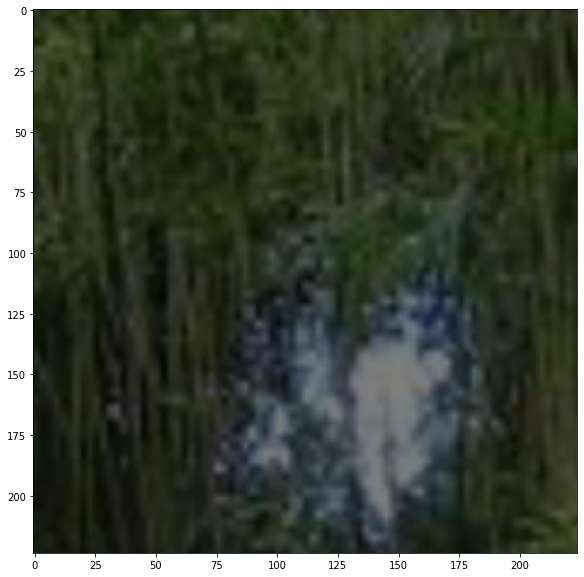

In [21]:
# Spot checks
i = np.random.choice(landimg_manipulated.shape[0], size=1)[0]
background_image_file = os.path.join('/data/ddmg/slabs/waterbirds/places_data/land_easy', 
                                     f'image_{i}.jpg')
img = tf.keras.preprocessing.image.load_img(background_image_file)
img = tf.keras.preprocessing.image.img_to_array(img)
img = tf.image.resize(img, (224, 224))
img = tf.cast(img, tf.uint8)
plt.figure(figsize=(10,10))
plt.imshow(img)

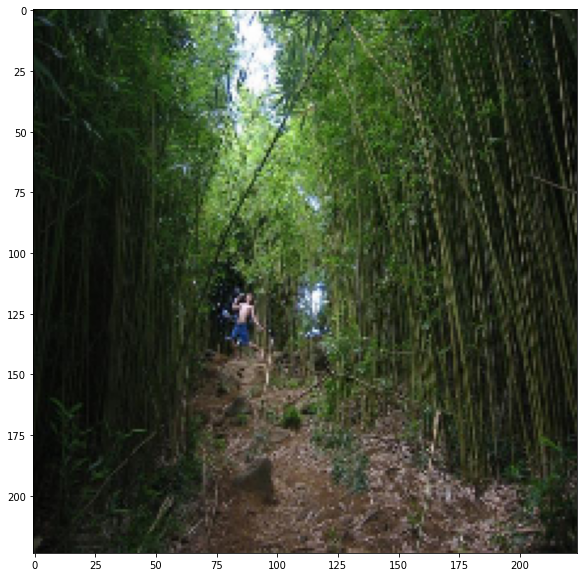

In [23]:
original_img = landimg_manipulated.iloc[i]['img']
background_image_file = os.path.join('/data/ddmg/slabs/waterbirds/places_data/land', 
                                     original_img)
img = tf.keras.preprocessing.image.load_img(background_image_file)
img = tf.keras.preprocessing.image.img_to_array(img)
img = tf.image.resize(img, (224, 224))
img = tf.cast(img, tf.uint8)
plt.figure(figsize=(10,10))
plt.imshow(img)



In [6]:
waterpath = '/data/ddmg/slabs/data_large/b/beach/'
waterfiles = [f for f in os.listdir(waterpath) if os.path.isfile(os.path.join(waterpath, f))]
waterfiles = waterfiles[:500]
print(waterfiles[0:4])

['00001725.jpg', '00001082.jpg', '00000165.jpg', '00003070.jpg']


In [7]:
bad_water = [
    1725, 1082, 3070, 504, 976, 4868, 2984, 
    2527, 1432, 4593, 1918, 4655, 4123, 2309, 
    4930, 4007, 1759, 119, 4814, 4466, 4310, 
    4771, 1788, 3248, 2403, 2133, 3773, 4248, 
    1964, 356, 2062, 3622, 90, 1177, 41, 3154, 
    852, 3292, 3947, 3818, 1498, 209, 4317, 
    1028, 4776, 668, 2404, 3991, 3244, 3625, 
    2065, 3312, 2920, 207, 1170, 97, 46, 4158, 
    2713, 1267, 4539, 3940, 3532, 162, 2190, 2637, 
    503, 3416, 2256, 2420, 2952, 4627, 4180, 4151, 
    4297, 4942, 389, 4736, 1068, 4091, 4882, 3889, 
    4421, 298, 4040, 815, 467, 3572, 2332, 6, 2753, 
    3113, 2781, 1130, 1697, 770, 2444, 311, 1923, 
    2101, 1014, 3487, 592, 235, 1807, 1303, 543, 
    931, 3824, 122, 2677, 3790, 4505, 4977, 869, 2088, 
    4612, 2059, 4273, 2438, 3278, 2106, 653, 3327, 3480, 
    2567, 2915, 232, 595, 936, 2211, 3451, 3823, 1765, 
    125, 3797, 4970, 1958, 4274, 4350, 2969, 4426, 1378,
    4381, 1719, 4047, 1220, 1587, 2335, 2492, 3907, 3575,
    1641, 1, 3114, 2754, 2785, 2022, 1137, 2832, 1556, 4643,
    4485, 3329, 4454, 4826, 412, 860, 3975, 2892, 2081, 3166, 
    2050, 705, 2843, 2396, 3271, 4414, 3369, 4703, 3596, 1916, 
    2010, 745, 794, 452, 2307, 117, 3002, 576, 3463, 2584, 2927, 
    1021, 661, 4246, 1179, 3688, 4683, 829, 110, 2645, 903, 571, 
    1496, 2224, 2583, 1781, 4778, 4241, 99, 4156, 48, 4537, 4290, 
    3079, 2258, 1898, 4413, 4365, 1849, 3236, 3591, 2804, 2476, 
    1563, 1911, 34, 3121, 2761, 455, 4939, 3932, 4866
]

bad_water = [str(x).zfill(8)+'.jpg' for x in bad_water]

In [8]:
waterfiles = [x for x in waterfiles if x not in bad_water]

In [9]:
len(waterfiles)

271

In [40]:

waterimg_manipulated = []
for i in range(len(waterfiles)):
    img_manipulation_df = all_manipulations.copy()
    img_manipulation_df['img'] = waterfiles[i]
    waterimg_manipulated.append(img_manipulation_df)

waterimg_manipulated = pd.concat(waterimg_manipulated)
print(waterimg_manipulated.shape)

waterimg_manipulated = waterimg_manipulated.sample(frac=1)
waterimg_manipulated.reset_index(drop=True, inplace=True)
print(waterimg_manipulated.head())
waterimg_manipulated['img_id'] = waterimg_manipulated.index
print(waterimg_manipulated.head())



(8672, 6)
   brightness  rotate180  rotate90  zoom15  zoom51           img
0        True       True      True   False    True  00000742.jpg
1       False       True      True   False    True  00001832.jpg
2        True      False     False    True   False  00000358.jpg
3       False       True     False    True    True  00004993.jpg
4        True       True     False    True   False  00000827.jpg
   brightness  rotate180  rotate90  zoom15  zoom51           img  img_id
0        True       True      True   False    True  00000742.jpg       0
1       False       True      True   False    True  00001832.jpg       1
2        True      False     False    True   False  00000358.jpg       2
3       False       True     False    True    True  00004993.jpg       3
4        True       True     False    True   False  00000827.jpg       4


In [41]:
for i in range(waterimg_manipulated.shape[0]):
    row = waterimg_manipulated.iloc[i]
    manipulate_and_save(row, waterpath, '/data/ddmg/slabs/waterbirds/places_data/water_easy')

